In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from download import query_phe as query, download_phe as download
from phe import plot_summary, read_csv

In [2]:
release='2020-12-30'

In [3]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2020-12-30,2020-12-29,United Kingdom,K02000001,8044,NaN,154.0,344775.0
1,2020-12-30,2020-12-28,United Kingdom,K02000001,28162,NaN,350.0,357238.0
2,2020-12-30,2020-12-27,United Kingdom,K02000001,43417,NaN,380.0,352702.0
3,2020-12-30,2020-12-26,United Kingdom,K02000001,38282,NaN,429.0,269876.0
4,2020-12-30,2020-12-25,United Kingdom,K02000001,13966,NaN,393.0,339024.0
...,...,...,...,...,...,...,...,...
349,2020-12-30,2020-01-15,United Kingdom,K02000001,0,NaN,NaN,NaN
350,2020-12-30,2020-01-14,United Kingdom,K02000001,0,NaN,NaN,NaN
351,2020-12-30,2020-01-13,United Kingdom,K02000001,0,NaN,NaN,NaN
352,2020-12-30,2020-01-12,United Kingdom,K02000001,0,NaN,NaN,NaN


In [4]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2020-12-30.csv')

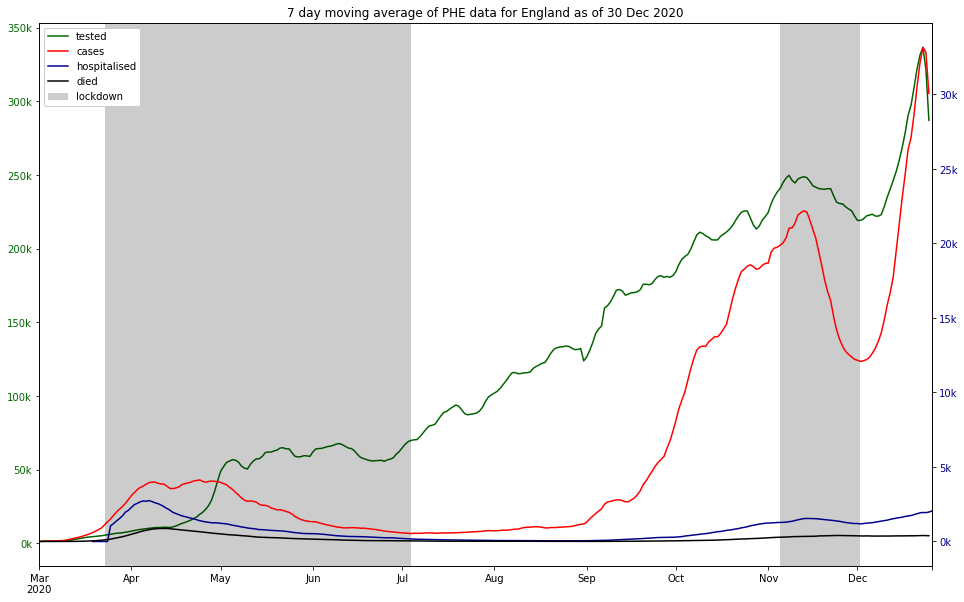

In [5]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [6]:
vaccine_path = download('vaccination', 'nation', first_dose, second_dose, first_dose_cum, second_dose_cum, release=release)
vaccine_path

PosixPath('/Users/chris/coronavirus/data/vaccination_2020-12-30.csv')

In [7]:
read_csv(vaccine_path)

,date,areaType,areaCode,areaName,newPeopleReceivingFirstDose,newPeopleReceivingSecondDose,cumPeopleReceivingFirstDose,cumPeopleReceivingSecondDose
0,2020-12-20,nation,S92000003,Scotland,37876,0,56676,0
1,2020-12-13,nation,S92000003,Scotland,18800,0,18800,0
2,2020-12-20,nation,E92000001,England,521594,0,521594,0
3,2020-12-20,nation,N92000002,Northern Ireland,12445,0,16068,0
4,2020-12-13,nation,N92000002,Northern Ireland,3623,0,3623,0
5,2020-12-20,nation,W92000004,Wales,14743,0,22595,0
6,2020-12-13,nation,W92000004,Wales,7852,0,7852,0


In [9]:
download(nation, nation, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2020-12-30.csv')

In [11]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2020-12-30.csv')

In [12]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2020-12-30.csv')

In [13]:
download(msoa, msoa, new_cases_sum, new_cases_rate, new_cases_change, release=release)

PosixPath('/Users/chris/coronavirus/data/msoa_2020-12-30.csv')